Problem Statement: 
----------------------------
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes. After the recent funding programmes, they have been able to raise around $ 10 million. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country.

### Import all the necessary libraries and read the data

In [160]:
#import all the necessary libraries

import pandas as pd
import numpy as np
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [161]:
#Let's read the dataset first
dat = pd.read_csv("Country-data.csv")
dat.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


#### Perform EDA and Clean the data where required.

In [162]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [163]:
dat.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


##### Check for NULL and NA's

In [164]:
dat.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

#### Convert below three columns to original values since they are in percentage values.

In [165]:
dat['exports'] = dat['exports']*dat['gdpp']/100
dat['imports'] = dat['imports']*dat['gdpp']/100
dat['health'] = dat['health']*dat['gdpp']/100

In [166]:
dat.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


#### Perform Outlier analysis we can clearly see that there are some outliers in all 9 columns of the dataset. But due to the business problem I dont look to remove outliers here as we have only 167 countires for analysis.

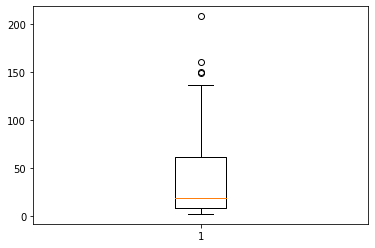

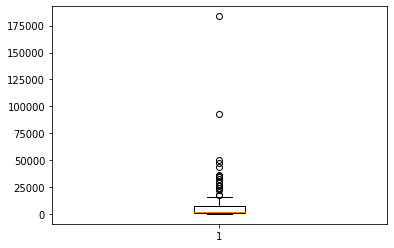

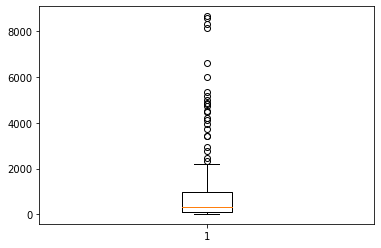

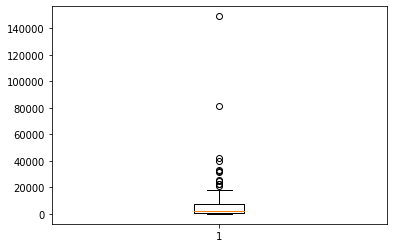

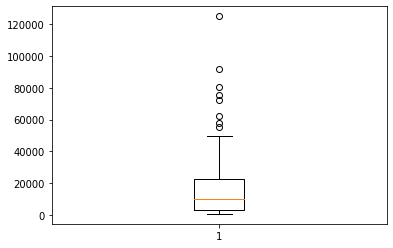

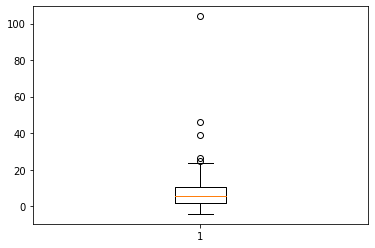

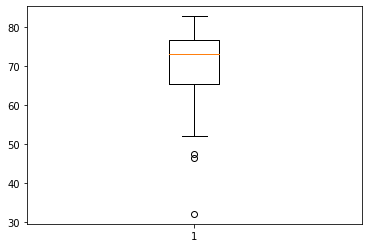

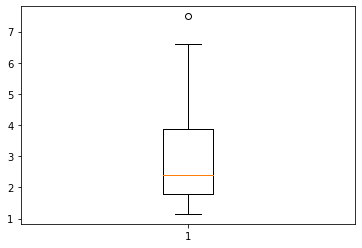

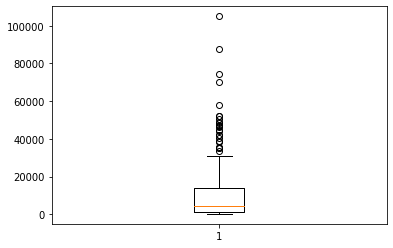

In [167]:
plt.figure(figsize=(6,4))
for fet in dat.columns:
    if fet != "country":
        plt.boxplot(dat[fet])
        plt.show()


#### Check for correlation in the data. We can clearly see that there is correlation exists between below mentioned columns after looking at pairplot and heatmap shown below.
 - child_mort and total_fer
 - child_mort and life_expec(Inverse Correlation)
 - exports with imports/income/gdpp
 - gdpp with health/imports/income

<Figure size 1440x1440 with 0 Axes>

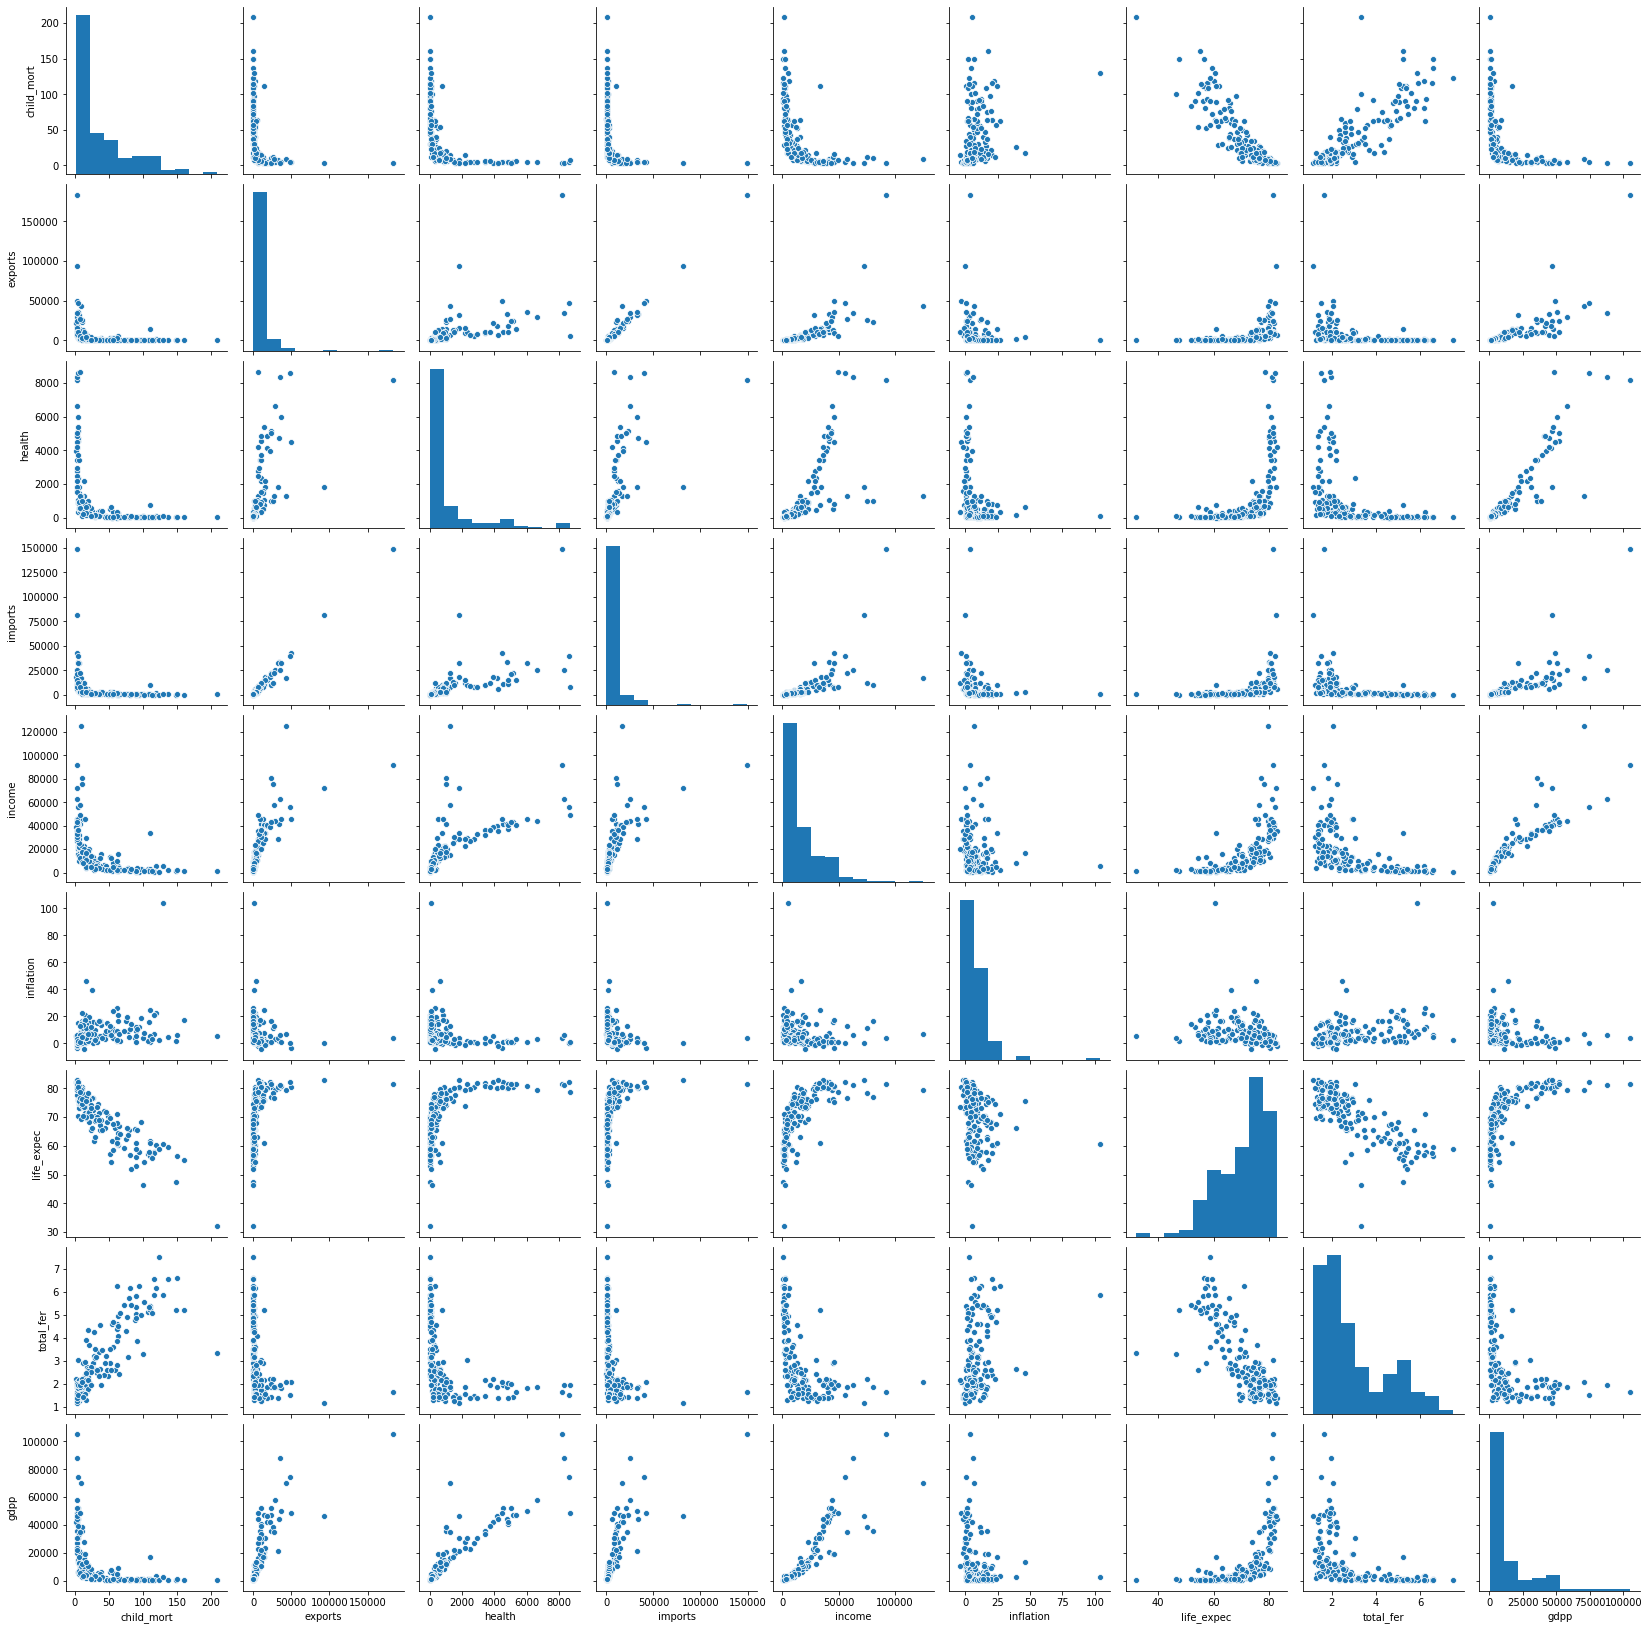

In [168]:
plt.figure(figsize=(20,20))
sns.pairplot(dat)
plt.show()

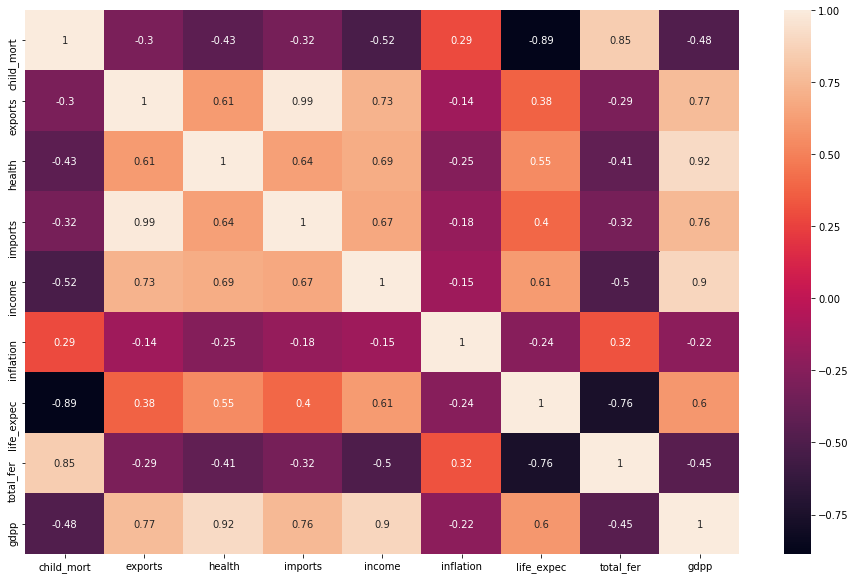

In [169]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Let's see the correlation matrix 
plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(dat.corr(),annot = True)

### Let's begin with analysis part 

#### Import and perform sklearn standard scaler fit_tranform on the data

In [170]:
#Remove the country column which is not required for PCA as of now.
dat1=dat.drop(['country'],axis=1)
dat1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [171]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
dat2 = standard_scaler.fit_transform(dat1)

#### PCA

In [172]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)
pca.fit(dat2)
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [173]:
#Let's check the variance ratios
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

##### Around 93% of the information is being explained by 3 components in screeplot below

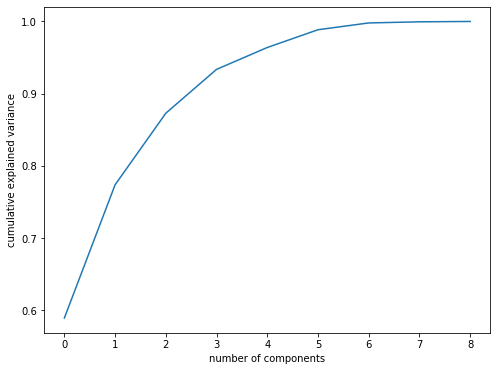

In [174]:
#Plotting the scree plot
%matplotlib inline
fig = plt.figure(figsize = (8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

##### Understanding how the original variables are loaded on the principal components from below

In [175]:
pcs_df = pd.DataFrame({ 'Feature':list(dat1.columns),'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2]})
pcs_df

,Feature,PC1,PC2,PC3
0,child_mort,-0.316392,0.476267,-0.150012
1,exports,0.342887,0.397311,-0.030574
2,health,0.358535,0.155053,-0.075703
3,imports,0.344865,0.370781,-0.072174
4,income,0.380041,0.128384,0.145764
5,inflation,-0.143085,0.221261,0.948419
6,life_expec,0.343857,-0.369820,0.196752
7,total_fer,-0.302842,0.459715,-0.077834
8,gdpp,0.399988,0.200624,0.010339


#### Plot scatterplot to visualise these features. 

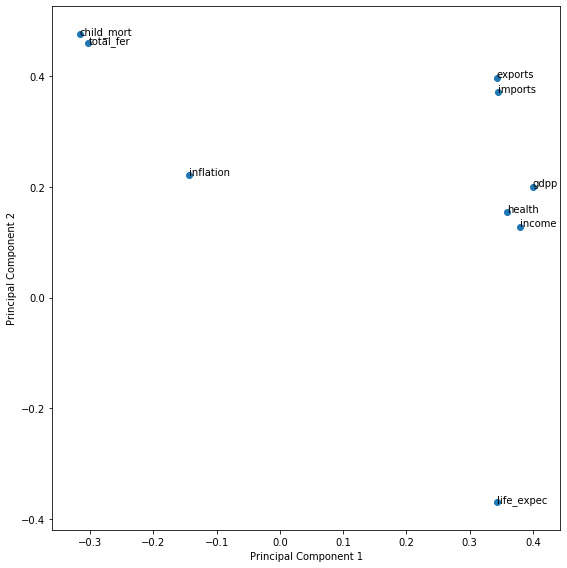

In [176]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [177]:
#Finally let's go ahead and do dimenstionality reduction using the three Principal Components
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=3)
df_pca = pca_final.fit_transform(dat2)
print(df_pca.shape)
print(df_pca)

(167, 3)
[[-2.63744157e+00  1.46903797e+00 -5.41359106e-01]
 [-2.22769569e-02 -1.43189586e+00 -2.07009539e-02]
 [-4.57626261e-01 -6.73300938e-01  9.61867281e-01]
 [-2.72452030e+00  2.17458267e+00  6.06686548e-01]
 [ 6.49848516e-01 -1.02437392e+00 -2.50102847e-01]
 [ 3.71968554e-02 -6.80889086e-01  1.46696276e+00]
 [-3.32691520e-01 -1.27451685e+00  1.76636110e-01]
 [ 3.18036154e+00 -2.50784878e-01 -1.16877257e-01]
 [ 3.81568156e+00  2.56083499e-01 -2.70495294e-01]
 [-4.67515152e-01 -4.93492360e-01  6.03288028e-01]
 [ 1.49875246e+00 -4.28907400e-01 -5.50237572e-01]
 [ 1.47097104e+00 -3.26795693e-01  4.28411771e-01]
 [-1.01419903e+00 -7.11807758e-01 -1.16988551e-01]
 [ 8.45238116e-01 -1.00860625e+00 -4.17261615e-01]
 [-1.34473920e-02 -9.82186148e-01  8.80913018e-01]
 [ 3.96087770e+00  8.38740841e-01 -2.94077196e-01]
 [-4.02707071e-01 -9.21816189e-01 -5.04892363e-01]
 [-2.36598657e+00  1.16845951e+00 -1.23525716e+00]
 [-7.14998191e-01 -7.68107039e-01 -1.34109127e-01]
 [-1.01778054e+00 -4.2

In [178]:
#Creating a transpose so that the each column is properly arranged
pc = np.transpose(df_pca)
pc

array([[-2.63744157e+00, -2.22769569e-02, -4.57626261e-01,
        -2.72452030e+00,  6.49848516e-01,  3.71968554e-02,
        -3.32691520e-01,  3.18036154e+00,  3.81568156e+00,
        -4.67515152e-01,  1.49875246e+00,  1.47097104e+00,
        -1.01419903e+00,  8.45238116e-01, -1.34473920e-02,
         3.96087770e+00, -4.02707071e-01, -2.36598657e+00,
        -7.14998191e-01, -1.01778054e+00,  2.52812687e-01,
        -1.13095912e+00,  1.66280202e-01,  2.69525065e+00,
         2.80569006e-01, -2.75387449e+00, -2.76406823e+00,
        -1.17929406e+00, -2.44142939e+00,  3.39411994e+00,
        -5.23229456e-01, -3.24153046e+00, -3.18889212e+00,
         6.92394286e-01, -1.28851026e-01, -1.38822916e-02,
        -1.94991207e+00, -3.11679859e+00, -2.04776384e+00,
         4.31523541e-01, -2.57476033e+00,  8.46278142e-01,
         2.31379384e+00,  1.67463303e+00,  4.37600084e+00,
        -3.67788028e-01, -3.02658561e-01, -8.36646810e-01,
        -3.36572123e-01, -1.05577406e+00, -1.94848965e+0

In [179]:
pcs_df2 = pd.DataFrame({'PC1':pc[0],'PC2':pc[1],'PC3':pc[2]})
pcs_df2.head()

,PC1,PC2,PC3
0,-2.637442,1.469038,-0.541359
1,-0.022277,-1.431896,-0.020701
2,-0.457626,-0.673301,0.961867
3,-2.724520,2.174583,0.606687
4,0.649849,-1.024374,-0.250103


##### Visualising the points on the PCs.

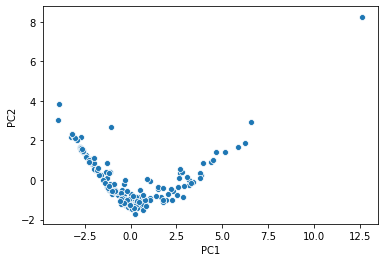

In [180]:
sns.scatterplot(x='PC1',y='PC2',data=pcs_df2)

## Clustering Process.

In [181]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

#### As shown below Hopkins measure is around 94%.

In [182]:
#Let's check the Hopkins measure
hopkins(pcs_df2)

0.9481680718521759

#### Applying K- Means Clustering

In [183]:
dat3_1 = pcs_df2

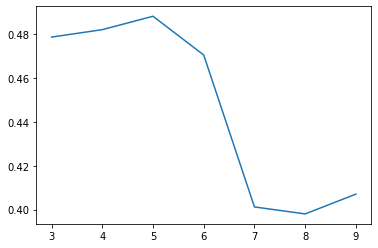

In [184]:
#First we'll do the silhouette score analysis
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(3, 10):
    kmeans = KMeans(n_clusters=k).fit(dat3_1)
    sse_.append([k, silhouette_score(dat3_1, kmeans.labels_)])
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

#### Silhouette Analysis score analysis for clusetsrs starting from 2 to 8. As you can see there si nto much different between score for 2/3/4. And hence choosing Cluster as 3 to cluster countries as Developed/Developing and Under Developing countries.  

In [185]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:  
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(dat3_1)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(dat3_1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.49093050017646556
For n_clusters=3, the silhouette score is 0.47848617291464945
For n_clusters=4, the silhouette score is 0.48186916213510383
For n_clusters=5, the silhouette score is 0.48768005516552715
For n_clusters=6, the silhouette score is 0.4703400869820655
For n_clusters=7, the silhouette score is 0.39502919283738197
For n_clusters=8, the silhouette score is 0.41316969581024865


#### Below is the Elbow curve and we see a distinct bend at around 3 clusters. Hence based on teh Silhoutte score and Elbow curve analysis optimal number of clusetrs would be 3.

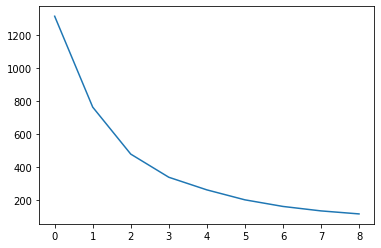

In [186]:
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(dat3_1)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [187]:
model_clus2 = KMeans(n_clusters = 3, max_iter=50,random_state = 50)
model_clus2.fit(dat3_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [188]:
dat4=pcs_df2
dat4.index = pd.RangeIndex(len(dat4.index))
dat_km = pd.concat([dat4, pd.Series(model_clus2.labels_)], axis=1)
dat_km.columns = ['PC1', 'PC2', 'PC3', 'ClusterID']
dat_km.head()

,PC1,PC2,PC3,ClusterID
0,-2.637442,1.469038,-0.541359,2
1,-0.022277,-1.431896,-0.020701,0
2,-0.457626,-0.673301,0.961867,0
3,-2.724520,2.174583,0.606687,2
4,0.649849,-1.024374,-0.250103,0


#### Below are the counts in each cluster

In [189]:
dat_km['ClusterID'].value_counts()

0    92
2    48
1    27
Name: ClusterID, dtype: int64

### Cluster Analysis and Visualising PC's with Cluster

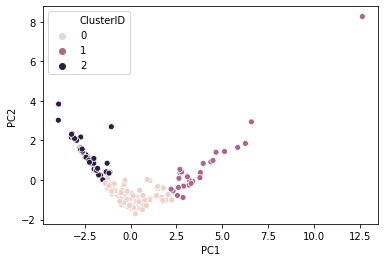

In [190]:
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=dat_km)

In [191]:
dat5=pd.merge(dat,dat_km, left_index=True,right_index=True)
dat5.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,-2.637442,1.469038,-0.541359,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,-0.022277,-1.431896,-0.020701,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,-0.457626,-0.673301,0.961867,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,-2.724520,2.174583,0.606687,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0.649849,-1.024374,-0.250103,0


#### Visualising child_mort/income with Cluster

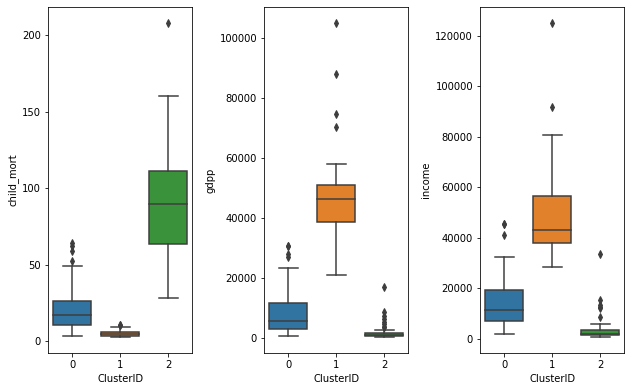

In [192]:
plt.figure(figsize=(20,6))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.5, top=0.9,wspace=0.5, hspace=0.5)
plt.subplot(131)
sns.boxplot(x='ClusterID', y='child_mort', data=dat5)
plt.subplot(132)
sns.boxplot(x='ClusterID', y='gdpp', data=dat5)
plt.subplot(133)
sns.boxplot(x='ClusterID', y='income', data=dat5)
plt.show()

#### So we have performed the clustering using the PCs and have now allocated the clusterIDs back to each of the datapoints

In [193]:
dat6=dat5.drop(['PC1','PC2','PC3'],axis=1)
dat6.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


#### As per the business statement we need to provide the list of under developing countries so that NGO can concentrate on these countries for providing basic amenities and relief during the time of disasters and natural calamities. Hence considering gdpp/income/child_mort to decide whcih countires are developed/developing/under developing coutries. 

In [194]:
clu_mort = pd.DataFrame(dat6.groupby(["ClusterID"]).child_mort.mean())
clu_inco = pd.DataFrame(dat6.groupby(["ClusterID"]).income.mean())
clu_gdpp = pd.DataFrame(dat6.groupby(["ClusterID"]).gdpp.mean())
df = pd.concat([pd.Series([0,1,2]),clu_mort,clu_inco,clu_gdpp], axis=1)
df.columns = ["ClusterID","child_mort","income","gdpp"]
#As we see below cluster 2 is having the very less mean values for income/gdpp an high mean for child_mort. 
#And the coutries in this cluster are the one which NGO should be targetting for providing basic amenities and relief during the time of disasters and natural calamities
df

,ClusterID,child_mort,income,gdpp
0,0,20.177174,14169.456522,8226.869565
1,1,5.092593,50833.333333,48759.259259
2,2,91.610417,3897.354167,1909.208333


#### With K-Means Clustering below are the under developing countries based on the average of Child_mort/income/gdpp.

In [195]:
fin=dat6.loc[(dat6['child_mort']>=90.273469)&(dat6['income']<= 3897.354167)&(dat6['gdpp']<= 1909.208333)]
fin

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
17,Benin,111.0,180.4040,31.0780,281.976,1820,0.885,61.8,5.36,758,2
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.810,57.9,5.87,575,2
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231,2
28,Cameroon,108.0,290.8200,67.2030,353.700,2660,1.910,57.3,5.11,1310,2
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.010,47.5,5.21,446,2
32,Chad,150.0,330.0960,40.6341,390.195,1930,6.390,56.5,6.59,897,2
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.800,57.5,6.54,334,2
40,Cote d'Ivoire,111.0,617.3200,64.6600,528.260,2690,5.390,56.3,5.27,1220,2
63,Guinea,109.0,196.3440,31.9464,279.936,1190,16.100,58.0,5.34,648,2
64,Guinea-Bissau,114.0,81.5030,46.4950,192.544,1390,2.970,55.6,5.05,547,2
